In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Total US data

In [2]:
df = pd.read_csv('../data/clean_data/merged_df.csv')

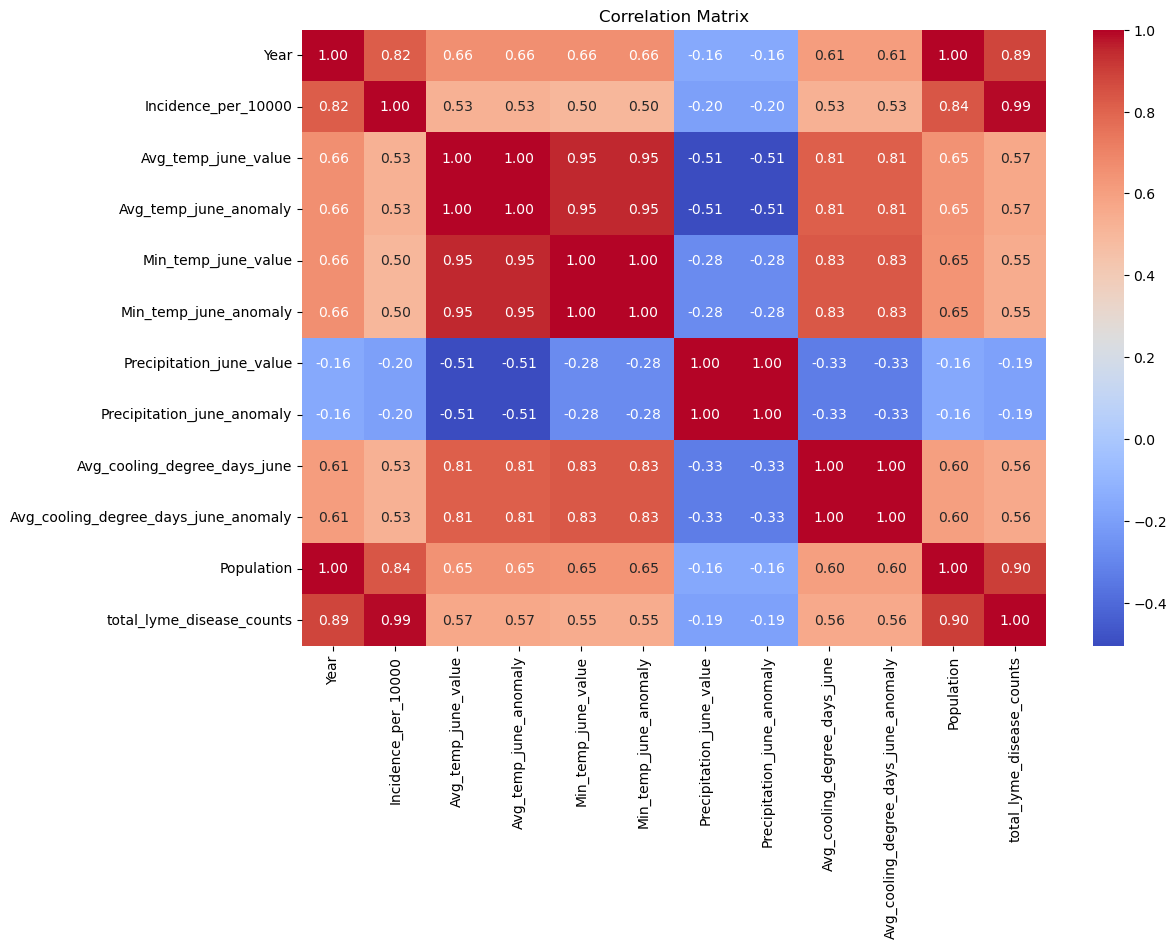

In [3]:
# correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

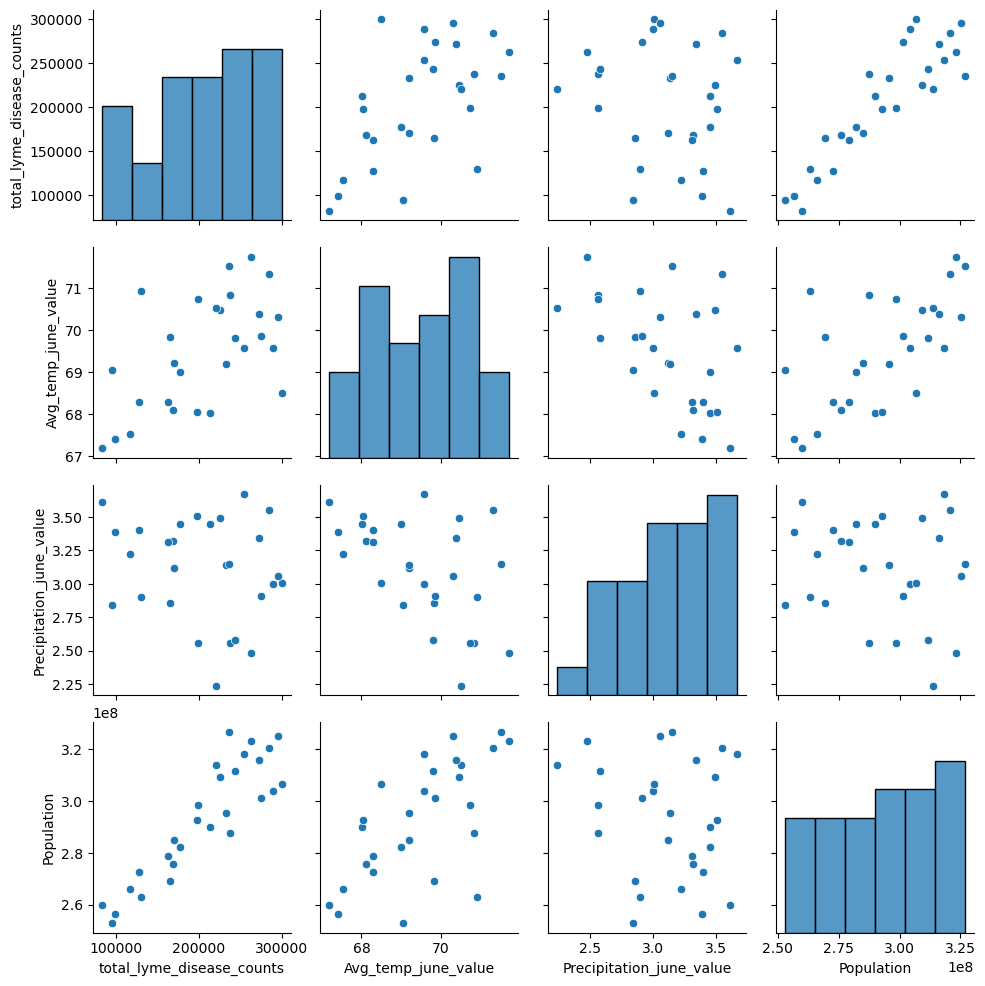

In [4]:
# Pairplot for key variables
sns.pairplot(df, 
             vars=["total_lyme_disease_counts", "Avg_temp_june_value", 
                   "Precipitation_june_value", "Population"])
plt.show()


## State data

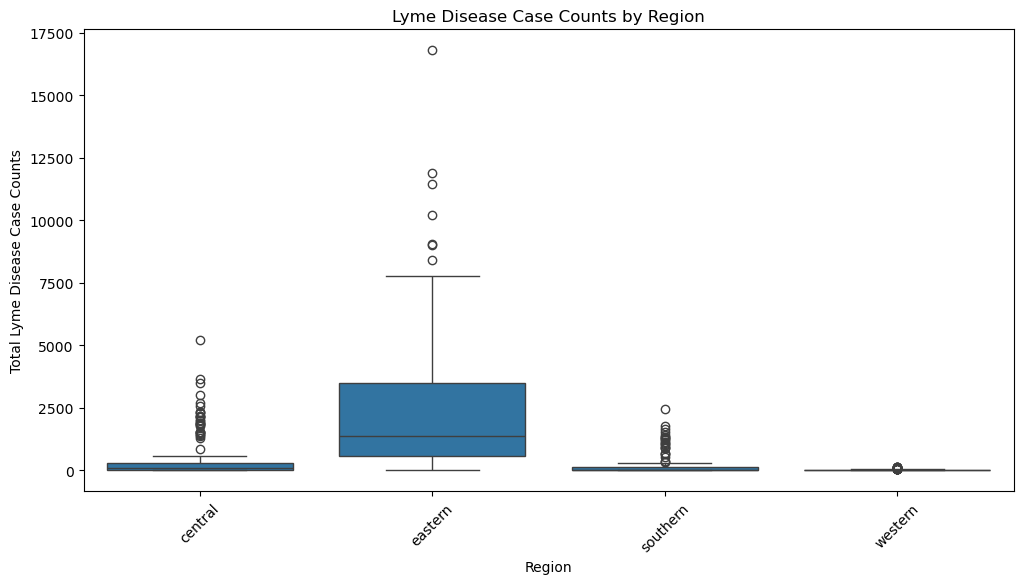

In [11]:
df = pd.read_csv('../data/clean_data/state_data.csv')
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='region', y='Lyme_cases')
plt.title('Lyme Disease Case Counts by Region')
plt.xlabel('Region')
plt.ylabel('Total Lyme Disease Case Counts')
plt.xticks(rotation=45)
plt.show()

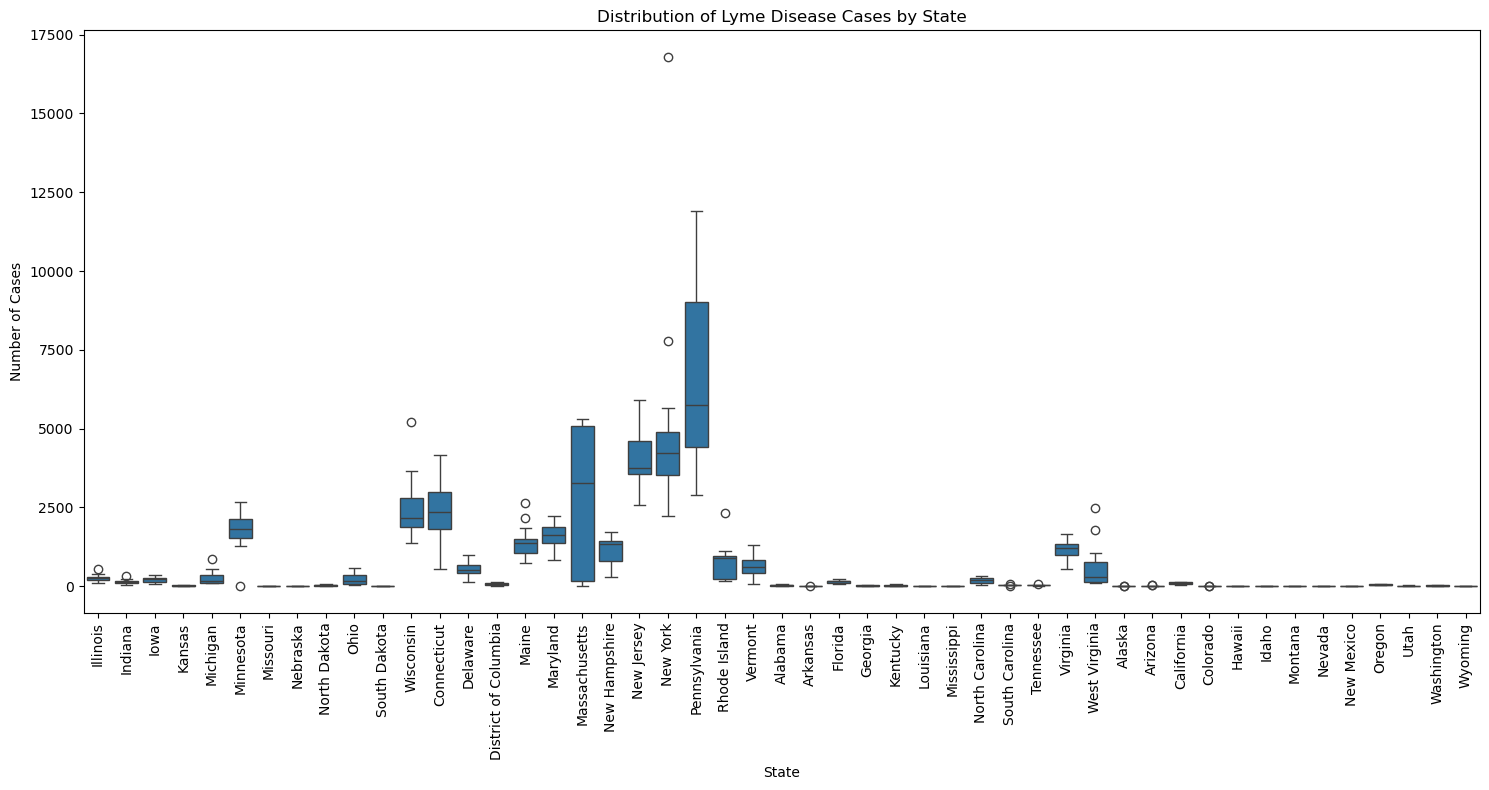

In [19]:
# Boxplot - Lyme disease by state
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='State', y='Lyme_cases')
plt.title('Distribution of Lyme Disease Cases by State')
plt.xticks(rotation=90)
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.show()

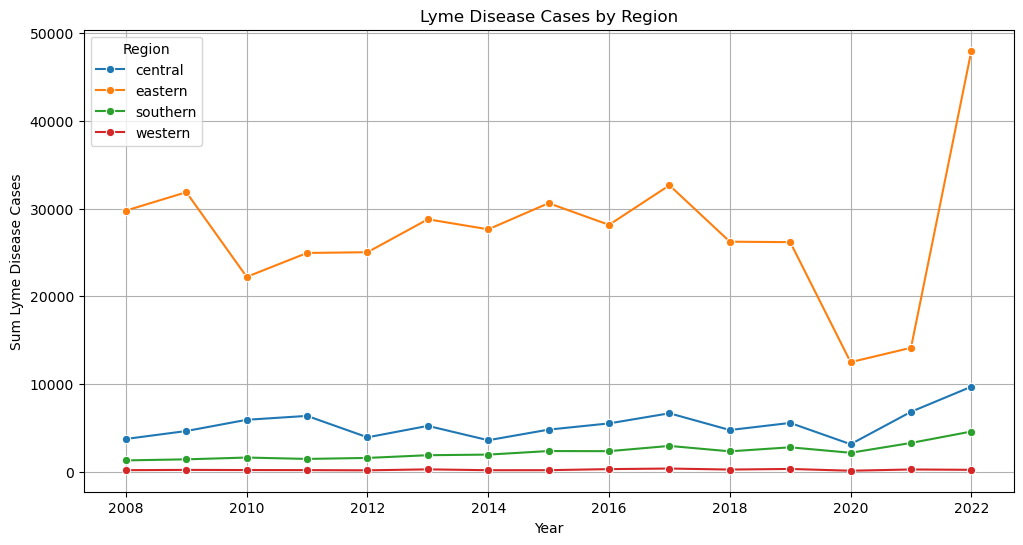

In [12]:
region_sum = df.groupby(['Year', 'region', 'Min_temp_avg', 'Avg_temp', 'Precipitation_avg'])['Lyme_cases'].sum().reset_index()

# line plot: 
plt.figure(figsize=(12, 6))
sns.lineplot(data=region_sum, x='Year', y='Lyme_cases', hue='region', marker='o')
xticks = range(int(region_sum['Year'].min()), int(region_sum['Year'].max()) + 1, 2)
plt.xticks(ticks=xticks)
plt.title('Lyme Disease Cases by Region')
plt.xlabel('Year')
plt.ylabel('Sum Lyme Disease Cases')
plt.legend(title='Region')
plt.grid(True)
plt.show()

In [15]:
print(df.columns)

Index(['Year', 'Precipitation_avg', 'region', 'Min_temp_avg', 'Avg_temp',
       'State', 'Lyme_cases', 'Total_Land_Area', 'Tree_Cover_Loss',
       'species_richness'],
      dtype='object')


   Year   region  Min_temp_avg  Avg_temp  Precipitation_avg  Total_Land_Area  \
0  2008  central          53.8      66.1               4.49          9436269   
1  2008  central          53.8      66.1               4.49         11993914   
2  2008  central          53.8      66.1               4.49         14584483   
3  2008  central          53.8      66.1               4.49         15008781   
4  2008  central          53.8      66.1               4.49         16929671   

   Tree_Cover_Loss  species_richness  Lyme_cases  
0             1051               8.0          42  
1             8298               4.0          45  
2              209               5.0         109  
3              615               6.0         108  
4            18604               6.0        2034  
                           Year  Min_temp_avg  Avg_temp  Precipitation_avg  \
Year               1.000000e+00      0.050247  0.067689          -0.039662   
Min_temp_avg       5.024703e-02      1.000000  0.974922  

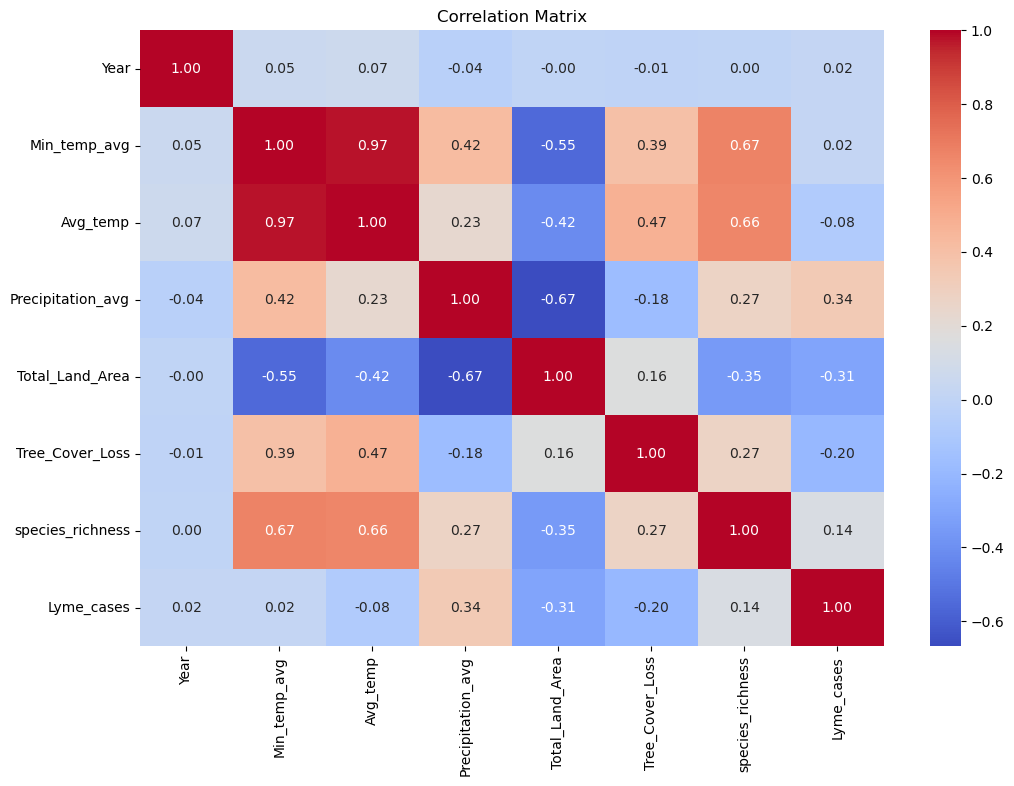

In [16]:
region_sum = df.groupby(['Year', 'region', 'Min_temp_avg', 'Avg_temp', 'Precipitation_avg', 'Total_Land_Area', 'Tree_Cover_Loss',
       'species_richness'])['Lyme_cases'].sum().reset_index()
print(region_sum.head())

numeric_df = region_sum.drop('region', axis=1)

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# visualize correlation matrix as heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix")
plt.show()